In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [29]:
data = pd.read_csv("ALS_TrainingData_2223.csv")

In [30]:
data.head()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [31]:
# Checking whether any null values are in the dataset.
data.isnull().sum()

ID                 0
Age_mean           0
Albumin_max        0
Albumin_median     0
Albumin_min        0
                  ..
trunk_min          0
trunk_range        0
Urine.Ph_max       0
Urine.Ph_median    0
Urine.Ph_min       0
Length: 101, dtype: int64

In [32]:
# Removing ID Feature.
ID =  data.drop(["ID"], axis=1, inplace=True)

In [33]:
data.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [34]:
Data = data.iloc[: , :].values
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#Data = scaler.fit_transform(sata)

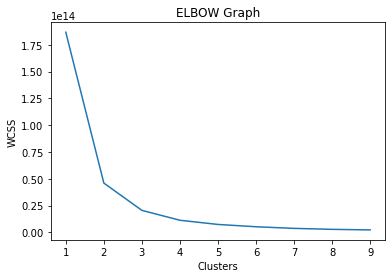

In [35]:
#Plotting Elbow Graph for selecting no of clusters.

wcss=[]
for i in range(1,10):
    km = KMeans(n_clusters = i, init = "k-means++", random_state = 0)
    km.fit(Data)
    wcss.append(km.inertia_)
plt.plot(range(1,10), wcss)
plt.xlabel("Clusters")
plt.ylabel("WCSS")
plt.title("ELBOW Graph")
plt.show()

Firstly we will try with 3 clusters.

In [36]:
kmeans3 = KMeans(n_clusters = 3, init = "k-means++", random_state=0)
kmeans3.fit(Data)

KMeans(n_clusters=3, random_state=0)

In [37]:
Train3_labels = kmeans3.labels_
Train3_labels

array([1, 1, 1, ..., 0, 0, 0])

In [38]:
# uploaded testing dataset. 
testing = pd.read_csv("ALS_TestingData_78.csv")
TestID = testing.drop(["ID"], axis=1, inplace =True)
test_data = testing.iloc[: , :].values

In [39]:
testresult3 = kmeans3.fit(test_data)

In [40]:
Test3_labels = kmeans3.labels_
Test3_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [41]:
# we need to verify clusters with 3 or 4 is very optimised.
# for that we use Silhoutte method.
print("The average silhouette score for training data (3 clusters) :", silhouette_score(Data, Train3_labels))
print("The average silhouette score for testing data (3 clusters) :", silhouette_score(test_data, Test3_labels))

The average silhouette score for training data (3 clusters) : 0.5909974863962754
The average silhouette score for testing data (3 clusters) : 0.6017794649560612


.

Now, we will try with 2 clusters.

In [42]:
kmeans2 = KMeans(n_clusters = 2, init = "k-means++", random_state=0)
kmeans2.fit(Data)
#wcss value of 4 clusters.
#print("With in Cluster Sum of Squares :",kmeans2.inertia_)

KMeans(n_clusters=2, random_state=0)

In [43]:
# WCSS value for 3 clusters.
#print("With in Cluster Sum of Squares :",kmeans2.inertia_)

#Centroid for 3 clusters.
#print("Centroid of the clusters :", kmeans2.cluster_centers_)

In [44]:
Train2_labels = kmeans2.labels_
Train2_labels

array([1, 1, 1, ..., 0, 0, 0])

In [45]:
Testresult2 = kmeans2.fit(test_data)

In [46]:
Test2_labels = kmeans2.labels_
Test2_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# we need to verify clusters with 3 or 4 is very optimised.
# for that we use Silhoutte method.
print("The average silhouette score for training data (2 clusters) :", silhouette_score(Data, Train2_labels))
print("The average silhouette score for testing data (2 clusters) :", silhouette_score(test_data, Test2_labels))

The average silhouette score for training data (2 clusters) : 0.6303941858456936
The average silhouette score for testing data (2 clusters) : 0.605346965210753


............................................................................................................................

The value of silhouette score lies between -1 to +1.
if the model has value 1 or near to 1, then it performs well. if it is -1 or near to -1, then model perfomance is bad.

From the above silhouette score, we found out that 2 clusters have better perfomance compared to 3 clusters. In both training dataset and testing dataset.

In [48]:
Labels = pd.DataFrame(Train2_labels)
Data_2clusters = pd.concat((data,Labels), axis=1)
Data_2clusters =  Data_2clusters.rename({0:"Labels"}, axis=1)
Data_2clusters.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,Labels
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0,1
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0,1
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0,1
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0,1
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0,1


In [49]:
#Centroid for  clusters.
print("Centroid of the clusters :", kmeans2.cluster_centers_)

Centroid of the clusters : [[ 5.39643240e+01  4.53260870e+01  4.24673913e+01  3.94347826e+01
   1.40087967e-02 -8.21768691e-01  2.98043478e+01  2.18586957e+01
   1.47173913e+01  2.80769622e-02  5.83695652e+01  3.37608696e+01
   2.33695652e+01  8.82144542e-02  4.28260870e+01  2.90434783e+01
   2.12173913e+01  5.71258745e-02  1.47826087e+00  6.68478261e-01
   3.17391304e-01  2.91335515e-03  2.72913043e+01  2.40304348e+01
   2.06934783e+01  1.79587590e-02  1.26086957e+01  8.28619565e+00
   5.35369565e+00  1.99388043e-02  7.25447826e+00  5.48743478e+00
   4.02904348e+00  9.23990763e-03  2.61450400e-03  9.10869565e+01
   8.05760870e+01  6.81304348e+01  5.60497353e-02  1.42282609e+02
   1.24836957e+02  1.08782609e+02  8.11279273e-02  2.54293478e+00
   2.42679348e+00  2.28586957e+00  6.10897587e-04  1.05239130e+02
   1.02423913e+02  9.95434783e+01  1.45172925e-02  7.13521739e+01
   5.69452174e+01  4.29652174e+01  7.35057015e-02  4.33913043e+00
   2.07934783e+00  9.06521739e-01  9.40611961e-03

In [50]:
#sns.pairplot(Data_2clusters, hue = "Labels")
#sns.lmplot(x='Sodium_range',y='ALSFRS_slope',data=Data_2clusters,hue='Labels',fit_reg=False)